<a href="https://colab.research.google.com/github/nishant-harinkhede12/Machine-Learning-Projects/blob/main/PURCHASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IN THIS STEP, IMPORTED REQUIRED LIBRARIES AND DATASET.

In [1]:
url1 = 'https://raw.githubusercontent.com/nishant-harinkhede12/Machine-Learning-Projects/nishant-harinkhede12-External-Task/data.csv'
url2 = 'https://raw.githubusercontent.com/nishant-harinkhede12/Machine-Learning-Projects/nishant-harinkhede12-External-Task/data.json'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

data1 = pd.read_csv(url1)
data2 = pd.read_json(url2)

print(len(data1))
print(len(data2))


156
181


IN THIS STEP BOTHE THE DATASET ARE COMPARED.

In [2]:
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            156 non-null    object
 1   guid           156 non-null    object
 2   purchase       156 non-null    bool  
 3   age            156 non-null    int64 
 4   gender         156 non-null    object
 5   experience_id  156 non-null    int64 
 6   variant_id     156 non-null    int64 
 7   event_date     156 non-null    object
dtypes: bool(1), int64(3), object(4)
memory usage: 8.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            181 non-null    object
 1   guid           181 non-null    object
 2   purchase       181 non-null    bool  
 3   age            181 non-null    int64 
 4   gender         181 non-null    obje

AS BOTH THE DATASET ARE HAVING COMMON FEATURES, CAN BE CONCATINATED.

In [3]:
d = [data1,data2]
data = pd.concat(d)
# TO CHECK ALL RECORDS ARE CONCATINATED FROM TWO DATASETS
print(len(data))

337


TO CHECK NULL HANDLING

In [4]:
# WE CAN CONCLUDE THERE IS NO NULL VALUES IN DATASET
# Data IS BACKUP OF ORIGINAL DATASET
Data = data.copy()
data.isnull().sum()

_id              0
guid             0
purchase         0
age              0
gender           0
experience_id    0
variant_id       0
event_date       0
dtype: int64

AS WE HAVE DATE COLUMN IN DATASET, WE MUST CONVERT IT INTO DATETIME FORMAT.
NOTE: ACCURACY OF MODEL WILL BE TESTED WITH AND WITHOUT EVENT DATE FEATURE, IN BELOW CODE THIS FEATURE IS CONSIDERED TO TRAIN THE MODEL.

In [5]:

data['event_date']=pd.to_datetime(data['event_date'],errors='coerce',format='%Y-%m-%d',utc=True)

data['event_year'] = data['event_date'].dt.year
data['event_month'] = data['event_date'].dt.month
data['event_day'] = data['event_date'].dt.day
data['event_hour'] = data['event_date'].dt.hour
data['event_minute'] = data['event_date'].dt.minute
data['event_second'] = data['event_date'].dt.second
data['event_dayofweek'] = data['event_date'].dt.dayofweek



EXPLORATORY DATA ANALYSIS [EDA]

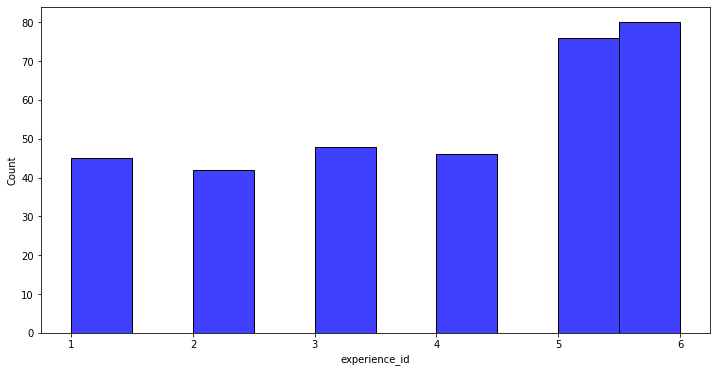

In [6]:
# BELOW GRAPHICAL REPRESENTATION IS GIVING COUNT OF CUSTOMERS WITH THEIR EXPERIENCE
plt.figure(figsize=(12,6))
sns.histplot(data['experience_id'],color = 'blue', label = 'experience id')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


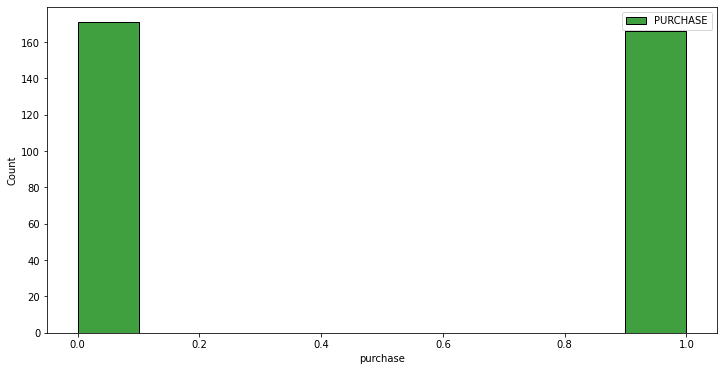

In [7]:
# BELOW GRAPHICAL REPRESENTATION IS GIVING COUNT OF PURCHASE FROM CUSTOMERS.
# THE DATASET IS ~ BALANCED
plt.figure(figsize=(12,6))
sns.histplot(data['purchase'],color = 'green', label = 'PURCHASE')
plt.legend()
plt.show()

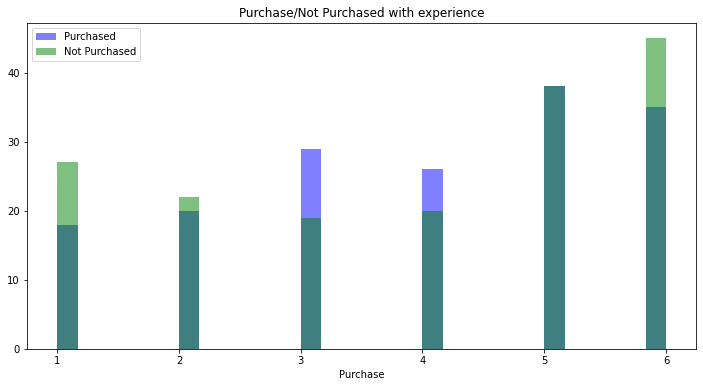

In [8]:
# BELOW GRAPHICAL REPRESENTATION IS GIVING INSIGHT AS CUSTOMERS WITH EXPERIENCE ID = 3&4 ARE PURCHASING THE PRODUCT
plt.figure(figsize=(12,6))
plt.hist(data[data['purchase']==True]['experience_id'],bins=30,alpha=0.5,color='blue', label='Purchased')
plt.hist(data[data['purchase']==False]['experience_id'],bins=30,alpha=0.5,color='green', label='Not Purchased')
plt.legend()
plt.xlabel('Purchase')
plt.title('Purchase/Not Purchased with experience')
plt.show()


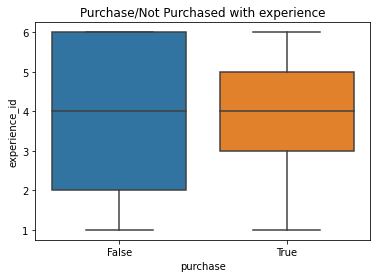

In [9]:
# BELOW BOX PLOT IS GIVING INSIGHT AS CUSTOMERS WITH EXPERIENCE ID BETWEEN 3 AND 5 ARE PURCHASING THE PRODUCT
sns.boxplot(x=data['purchase'],y=data['experience_id'])
plt.title('Purchase/Not Purchased with experience')
plt.show()


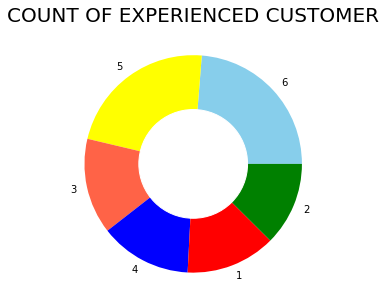

In [10]:
# BELOW PIE CHART IS GIVING INSIGHT AS COUNT OF CUSTOMERS WITH DIFFERENT EXPERIENCE ID
a = data["experience_id"].value_counts()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellow", 'tomato', "blue", "red",'green']
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("COUNT OF EXPERIENCED CUSTOMER", fontsize=20)
plt.show()

"FEATURE SELECTION": AS PER THE OBSERVATION FROM DATASET
(1) '_id' AND 'guid' COLUMNS OF DATASET ARE REPRESENTING UNIQUE CUSTOMER INFORMATION
(2) 'gender' COLUMN IS HAVING UNIQUE VALUE AS FEMALE

WE CAN CONCLUDE THAT GENDER AS A FEATURE CAN BE IGNORED AND ONE OF THE CUSTOMER REPRESENATATION BETWEEN '_id' AND 'guid' CAN BE CONSIDERED

In [11]:

print('count of id',data['_id'].value_counts())
print('count of guid',data['guid'].value_counts())
print('count of gender',data['gender'].value_counts())


count of id 61532e0a9a12d95c190c0705    1
61532e0a9f2836473bf537ca    1
61532e0a219467e0fe8111a4    1
61532e0ae5089cc082d2e3ad    1
61532dd3c72ad88a022ddcbb    1
                           ..
61532e0a8861537a0e8d135a    1
61532dd3e78e9151fedc822a    1
61532e0ad33e03ceba1506d0    1
61532e0ab7772bf72b76e88c    1
61532e0a5227fdc639501730    1
Name: _id, Length: 337, dtype: int64
count of guid 5dfcd542-72f2-4d59-8d33-69aee086c12a    1
10a0bd47-0f59-4217-bbe3-b5e41c29a02c    1
488d402c-eca4-4c0e-8212-f7976084a7b0    1
7315d08e-ffd7-445b-947f-2da0b8bfb875    1
432fa3da-e428-4caf-a6fe-e9f88184e9da    1
                                       ..
2850bdc1-9fe4-480a-bece-169ecfefcc05    1
86154d67-c32d-4d15-9282-49e99bfe6fd1    1
979f453e-aa56-449e-97e9-639b3ac823be    1
d61ddac3-c9fd-4e19-9645-48ac3e5d9519    1
5eaecd43-f734-424e-96ad-d5830e98f8df    1
Name: guid, Length: 337, dtype: int64
count of gender female    337
Name: gender, dtype: int64


THIS DATASET IS CONSIDERED FOR THE CLASSIFICATION PROBLEM WHERE BASED ON THE AVAILABLE INFORMATION, CUSTOMER WILL "PRUCHASE/NOT PURCHASE THE PRODUCT" TO BE PREDICTED.

DEFINING INDEPENDENT AND TARGET VARIABLE

In [12]:
x = data.drop(['gender','guid','purchase','event_date'],axis=1).values
y = data['purchase'].values


DATA PREPROCESSING AND FEATURE SCALING

In [13]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

LE.fit_transform(x[:,0])
x[:,0]= LE.fit_transform(x[:,0])

LE.fit_transform(x[:,1])
x[:,1]= LE.fit_transform(x[:,1])

LE.fit_transform(y)
y= LE.fit_transform(y)

#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_test)


array([[ 0.37526518,  1.32546059,  1.22754288,  0.37910353, -0.87072954,
         1.36510601, -1.20301916, -0.64362383,  1.52397467,  1.00461979,
        -1.53831488],
       [ 0.82695012,  0.32062574,  0.65525686,  0.37910353, -0.87072954,
         0.11074729,  0.2973225 ,  1.45316453, -1.00657586, -0.86032892,
         0.02518652],
       [-1.33693589, -1.52157148,  0.08297084, -0.99898904, -0.87072954,
         1.99228538,  1.79766416, -1.8417886 ,  0.06187881, -0.62721033,
         0.02518652],
       [-1.49450041, -0.18179168,  0.08297084, -0.99898904,  1.14846224,
        -0.2028424 ,  1.56684236, -0.64362383, -0.9503414 ,  0.36354367,
         1.06752078],
       [-1.32643159, -1.01915405, -0.48931519,  0.37910353, -0.87072954,
         1.67869569,  1.45143147, -1.54224741, -0.38799684,  0.88806049,
         1.06752078],
       [-0.04490686, -0.51673663,  0.08297084,  0.37910353,  1.14846224,
        -0.51643208, -0.97219737, -0.94316502,  1.13033347,  0.13042508,
        -0.495

LOGISTIC REGRESSION MODEL IS GIVING 60% ACCURACY

In [14]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_test,y_pred)
print("accuracy score of LogisticRegression = ",ac1)

accuracy score of LogisticRegression =  0.6029411764705882


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RANDOM FOREST MODEL IS GIVING 51% ACCURACY

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
ac2 = accuracy_score(y_test,y_pred)
print("accuracy score of RandomForestClassifier = ",ac2)

accuracy score of RandomForestClassifier =  0.5147058823529411


NAIVE BAYS MODEL IS GIVING 58% ACCUARACY

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
ac3 = accuracy_score(y_test,y_pred)
print("accuracy score of naive_bayes = ",ac3)

accuracy score of naive_bayes =  0.5882352941176471


SUPPORT VECTOR CLASSIFIER IS GIVING 52% ACCURACY

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print("accuracy score of svc = ",ac)

[[36  0]
 [32  0]]
accuracy score of svc =  0.5294117647058824


XGBOOST CLASSIFIER IS GIVING 51% ACCURACY

In [18]:
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bytree = 0.9, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print("accuracy score of XGBClassifier = ",ac)


[[18 18]
 [15 17]]
accuracy score of XGBClassifier =  0.5147058823529411


SUMMARY: THE MAXIMUM ACCURACY IS ACHIEVED FROM LOGISTIC REGRESSION MODEL. THERE ARE FEW FEATURES THAT ARE MISSING LIKE CUSTOMER INCOME AND PRICE OF THE PRODUCT, WHICH MAY HELP IN PREDICTING THE BUYING PATTERN OF CUSTOMER WITH HIGHER ACCURACY.

BELOW LINE OF CODES ARE EXECUTED WITHOUT EVENT DATE COLUMN TO CHECK THE ACCURACY OF MODEL WITHOUT DATE FEATURE.

In [19]:
Data = Data.drop(['guid','event_date','gender'],axis=1)

In [20]:
Data.head()

,_id,purchase,age,experience_id,variant_id
0,61532e0a3dceebb2dcf915b1,True,32,5,2
1,61532e0a8a22380d4f703166,True,21,5,3
2,61532e0a47c9a6f60c31e790,True,23,5,2
3,61532e0a69ff25cd716301e0,False,35,6,1
4,61532e0a83ab523053498fa4,True,28,6,3


In [21]:
x= Data.drop(['purchase'],axis=1).values
y = Data['purchase'].values

In [22]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

LE.fit_transform(x[:,0])
x[:,0]= LE.fit_transform(x[:,0])

LE.fit_transform(y)
y= LE.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_test)


array([[ 0.37526518,  1.32546059,  1.22754288,  0.37910353],
       [ 0.82695012,  0.32062574,  0.65525686,  0.37910353],
       [-1.33693589, -1.52157148,  0.08297084, -0.99898904],
       [-1.49450041, -0.18179168,  0.08297084, -0.99898904],
       [-1.32643159, -1.01915405, -0.48931519,  0.37910353],
       [-0.04490686, -0.51673663,  0.08297084,  0.37910353],
       [ 1.37317378,  0.48809822,  1.22754288, -0.99898904],
       [-0.68566923,  0.32062574, -1.63388723,  0.37910353],
       [ 0.84795872,  0.48809822,  0.65525686,  0.37910353],
       [ 1.14207915, -1.354099  ,  1.22754288,  1.75719611],
       [ 0.66938561,  0.82304316,  1.22754288, -0.99898904],
       [ 1.22611356,  0.82304316,  1.22754288,  0.37910353],
       [ 0.83745442, -0.85168158,  1.22754288,  1.75719611],
       [-1.56803051,  0.99051564,  0.08297084, -0.99898904],
       [ 1.79334582, -0.51673663,  1.22754288,  0.37910353],
       [ 0.54333399,  0.82304316,  0.65525686,  0.37910353],
       [ 0.38576948, -1.

In [23]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_test,y_pred)
print("accuracy score of LogisticRegression = ",ac1)

accuracy score of LogisticRegression =  0.5588235294117647


FALL IN ACCURACY OF LOGISTIC REGRESSION MODEL FROM PREVIOUS RUN SUGGEST THAT EVENT DATE FEATURE CANNOT BE IGNORED.